In [180]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import streamlit as st
import joblib


In [181]:
path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/immobili.csv"

In [182]:
df = pd.read_csv(path)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.03,80.8,2.505,1,273,21.0,396.9,7.88,11.9


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   crim     507 non-null    object
 1   zn       507 non-null    object
 2   indus    507 non-null    object
 3   chas     507 non-null    object
 4   nox      507 non-null    object
 5   rm       507 non-null    object
 6   age      507 non-null    object
 7   dis      507 non-null    object
 8   rad      507 non-null    object
 9   tax      507 non-null    object
 10  ptratio  507 non-null    object
 11  b        507 non-null    object
 12  lstat    507 non-null    object
 13  medv     507 non-null    object
dtypes: object(14)
memory usage: 55.6+ KB


In [184]:
df = df.drop(index=df.index[-1])

In [185]:
df = df.astype(float)

In [186]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [187]:
df = df.rename(columns={'medv': 'price'})

In [188]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'price'],
      dtype='object')

<Axes: >

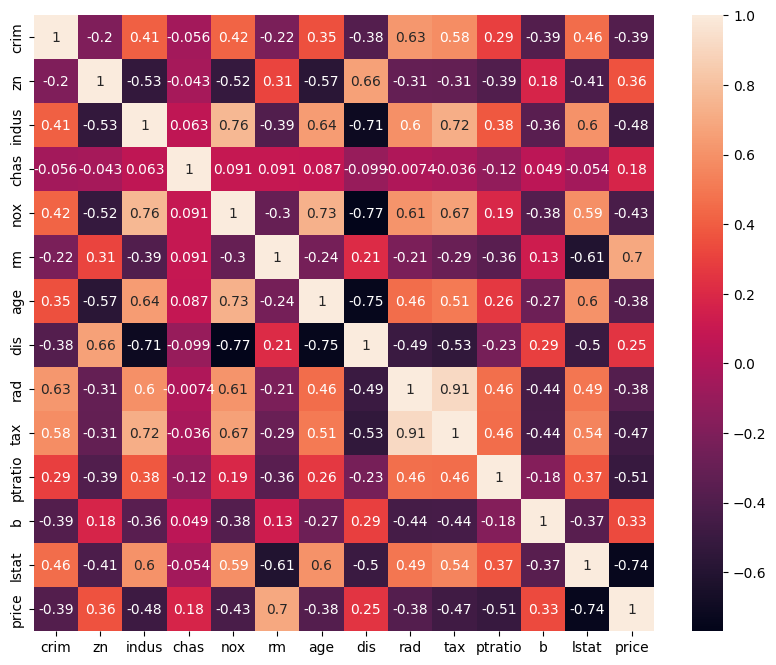

In [189]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [190]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'price'],
      dtype='object')

In [191]:

df2 = df.drop(['crim', 'zn', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'b'], axis=1)

In [192]:
df2

,indus,tax,ptratio,lstat,price
0,2.31,296.0,15.3,4.98,24.0
1,7.07,242.0,17.8,9.14,21.6
2,7.07,242.0,17.8,4.03,34.7
3,2.18,222.0,18.7,2.94,33.4
4,2.18,222.0,18.7,5.33,36.2
...,...,...,...,...,...
501,11.93,273.0,21.0,9.67,22.4
502,11.93,273.0,21.0,9.08,20.6
503,11.93,273.0,21.0,5.64,23.9
504,11.93,273.0,21.0,6.48,22.0


In [193]:
y=df2['price']
X=df2.drop(columns='price')

In [194]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               train_size=0.25,
                                               random_state=667)

In [195]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [196]:
model.coef_

array([-0.08535739, -0.00225948, -1.37338689, -0.70430768])

In [197]:
model.intercept_

58.621692134752436

In [198]:
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

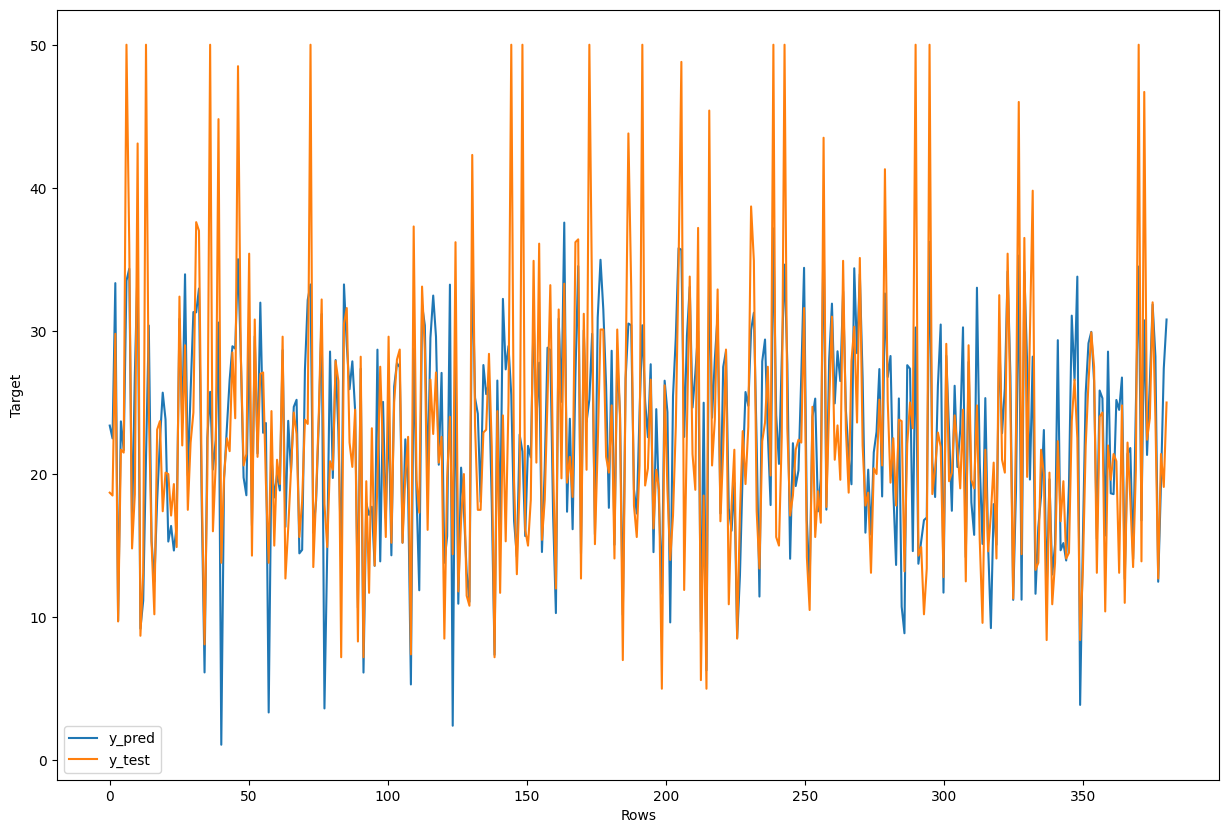

In [199]:
plt.figure(figsize = (15, 10))
x = np.linspace(0,y_pred.shape[0], y_pred.shape[0])
plt.plot(x,y_pred)
plt.plot(x, y_test)
plt.title('')
plt.xlabel('Rows')
plt.ylabel('Target')
plt.legend(labels= ['y_pred', 'y_test'])

In [200]:
res_df = pd.DataFrame(data=list(zip(y_pred, y_test)),columns=['predicted', 'real'])
res_df

,predicted,real
0,23.387129,18.7
1,22.492659,18.5
2,33.341664,29.8
3,9.742870,9.7
4,23.682248,21.7
...,...,...
375,28.234494,23.9
376,12.474743,12.7
377,19.345006,21.4
378,27.378214,19.1


In [201]:
res_df['error'] = res_df['real'] - res_df['predicted']
res_df

,predicted,real,error
0,23.387129,18.7,-4.687129
1,22.492659,18.5,-3.992659
2,33.341664,29.8,-3.541664
3,9.742870,9.7,-0.042870
4,23.682248,21.7,-1.982248
...,...,...,...
375,28.234494,23.9,-4.334494
376,12.474743,12.7,0.225257
377,19.345006,21.4,2.054994
378,27.378214,19.1,-8.278214


In [202]:
r2score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred, squared=False)
    
print('R2 score:',r2score)
print('MAE:' ,mae)
print('MSE:',mse)
print('RMSE:',rmse)

R2 score: 0.5702256773252012
MAE: 4.268197212299686
MSE: 37.36747195882328
RMSE: 6.112893910319668


In [203]:

joblib.dump(model,'regression_test.pkl')
newmodel = joblib.load('regression_test.pkl')
newmodel

LinearRegression()

In [204]:
newmodel.predict([[1,2,3,4]])

c:\Users\ifoa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([51.59442439])